### Compare Subnational to SVI
Compare subnational data to SVI data in the USA.

Link for GEE code that gets HRLS data: https://code.earthengine.google.com/90f2a6abfd3f1d09c5432d6cb237e62a

#### 1. Clean Data

In [ ]:
# Import functions
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt # display
import seaborn as sns # display

In [ ]:
# set wd
wd_path = "C:\\Users\\rcompos\\OneDrive - North Carolina State University\\Documents\\Research\\SVI_Flood_Project"
os.chdir(wd_path)
os.getcwd() # get wd
#os.listdir() # get available data

In [ ]:
# Set data paths
sub = pd.read_csv("Subnational\\sub_pov - selections.csv")
svi_cnty = pd.read_csv("SVI\\SVI2020_US_COUNTY.csv")
svi_tra = pd.read_csv("SVI\\SVI2020_US_tract.csv")
hrls_st = pd.read_csv("HRLS\\HRLS_combo_v7.csv")
hrls_cnty = pd.read_csv("HRLS\\HRLS_cnty_v1.csv")

In [ ]:
# View data

#sub.head(5)
#hrls.head()
#svi_cnty.head(5)
#svi_tra.head(5)
#sub.dtypes
#svi_cnty.dtypes


##### 1.1 Prep HRLS data

In [ ]:
# Prep HRLS data by state

# Calculate percentile rank
hrls_st['w_p'] = hrls_st.Num_wo.rank(pct=True)
hrls_st['y_p'] = hrls_st.Num_ol.rank(pct=True)
hrls_st['o_p'] = hrls_st.Num_yo.rank(pct=True)

# Caclualte average
hrls_st['hrls_ave'] = hrls_st[['w_p','y_p','o_p']].mean(axis=1)

# rename state names to match subnational data
hrls_st = hrls_st.rename(columns = {'NAME':'STATE'})

#hrls.head()

In [ ]:
# Prep HRLS data by county

# Calculate percentile rank
hrls_cnty['w_p'] = hrls_cnty.Num_wo.rank(pct=True)
hrls_cnty['y_p'] = hrls_cnty.Num_ol.rank(pct=True)
hrls_cnty['o_p'] = hrls_cnty.Num_yo.rank(pct=True)

# Caclualte average
hrls_cnty['hrls_ave'] = hrls_cnty[['w_p','y_p','o_p']].mean(axis=1)

# rename state names to match subnational data
hrls_cnty = hrls_cnty.rename(columns = {'NAME':'STATE'})

#hrls.head()

##### 1.2 Prep Subnational data

In [ ]:
# Prep subnational data to add to svi
sub_usa = sub[sub['code'] == 'USA'] # select usa data
#len(sub_usa) # 51, includes D.C.
#print(sub_usa[['STATE']].to_string(index=False)) # get list of states

sub_usa = sub_usa.rename(columns = {'State':'STATE','Mean Rank (SVI)':'sub_mean_rank'}) # rename column to match svi data
sub_usa = sub_usa[['STATE','sub_mean_rank']] # select columns
sub_usa['sub_mean_rank'] = sub_usa['sub_mean_rank'].astype(float)
#print(sub_usa.dtypes)

sub_usa['sub_rank'] = sub_usa.sub_mean_rank.rank(pct=True)

#sub_usa.head()


In [ ]:
# Code to group & filter svi data

# Group svi data by state
#svi_st_m = svi_cnty.groupby('STATE').mean().reset_index()
# svi_st_m_s = svi_st_m.iloc[:,np.r_[0, 11:40]] # filter columns
#len(svi_st_m) # 51, includes D.C.
#svi_st_m_s.head(5)
#print(svi_st_m[['STATE']].to_string(index=False)) # get list of states

##### 1.3 Prep SVI data

In [ ]:
# SVI data by state & the themes
svi_cnty = svi_cnty[['STATE','RPL_THEMES','RPL_THEME1','RPL_THEME2','RPL_THEME3','RPL_THEME4']]

# Aggregate svi data by state
svi_st_med = svi_cnty.groupby('STATE').median().reset_index() 
svi_st_m = svi_cnty.groupby('STATE').mean().reset_index()

##### 1.4 Combine Datasets

In [ ]:
# Combine hrls & subnational to svi by state

# Combine hrls & subnational data
sub_hrls = pd.merge(sub_usa, hrls, on =['STATE'], how = 'left')
sub_hrls['final_ave'] = sub_hrls[['hrls_ave','sub_rank']].mean(axis =  1)
sub_hrls = sub_hrls[['STATE','sub_mean_rank','sub_rank','hrls_ave','final_ave']]
#sub_hrls.head()

# Combine hrls & subnational TO svi data
sub_hrls_svi_med_merged = pd.merge(sub_hrls, svi_st_med, on =['STATE'], how = 'left')

# Combine by state mean
sub_hrls_svi_merged = pd.merge(sub_hrls, svi_st_m, on =['STATE'], how = 'left')
sub_hrls_svi_merged.head()
#sub_hrls_svi_merged.dtypes



In [ ]:
# Combine hrls & subnational to svi by county

# Combine hrls & subnational data
sub_hrls_c = pd.merge(sub_usa, hrls, on =['STATE'], how = 'left')
sub_hrls_c['final_ave'] = sub_hrls[['hrls_ave','sub_rank']].mean(axis =  1)
sub_hrls_c = sub_hrls_c[['STATE','GEOID','sub_mean_rank','sub_rank','hrls_ave','final_ave']]
#sub_hrls_c.head()

# Combine hrls & subnational TO svi data
sub_hrls_svi_med_merged = pd.merge(sub_hrls, svi_st_med, on =['GDOID'], how = 'left')

# Combine by state mean
sub_hrls_svi_merged = pd.merge(sub_hrls, svi_st_m, on =['GEOID'], how = 'left')
sub_hrls_svi_merged.head()
#sub_hrls_svi_merged.dtypes

In [ ]:
# Combine svi & subnational datasets

# Combine by state median
svi_st_med_merged = pd.merge(sub_usa, svi_st_med, on =['STATE'], how = 'left')
#svi_st_med_merged.head()

# Combine by state mean
svi_st_merged = pd.merge(sub_usa, svi_st_m, on =['STATE'], how = 'left')
#svi_st_merged.head()
#svi_merged.dtypes

# Combine by county
svi_cnty_merged = pd.merge(svi_cnty, sub_usa, on =['STATE'], how = 'left')
#svi_cnty_merged.head()

# Combine by tract
svi_tra_merged = pd.merge(svi_tra, sub_usa, on =['STATE'], how = 'left')
#svi_tra_merged.head()


#### 2. Compare w/ simple linear correlation at State Level


*Notes:* Closer to 0 is less correlated & closer to 1 or -1 is more correlated, datasets must be same length

*Source:*  https://www.geeksforgeeks.org/exploring-correlation-in-python/

##### 2.1 Subnational & HRLS and SVI Correlation

In [ ]:
# Find the pearson correlations matrix

# Combined and svi mean
combo_corr = sub_hrls_svi_merged.corr(method='pearson')
print('Rank by final mean')
print(combo_corr.sort_values(by='final_ave', ascending=False).head(7)) # order results
print()

# Combined and svi mean
combo_med_corr = sub_hrls_svi_med_merged.corr(method='pearson')
print('Rank by final median')
print(combo_corr.sort_values(by='final_ave', ascending=False).head(7)) # order results
print()

# By state median
svi_st_med_corr = svi_st_med_merged.corr(method = 'pearson') # run correlation
print('Rank by State svi median')
print(svi_st_med_corr[['sub_mean_rank']].sort_values(by='sub_mean_rank', ascending=False).head(7)) # order results
print()

# By state mean
svi_st_corr = svi_st_merged.corr(method = 'pearson') # run correlation
print('Rank by State svi mean')
print(svi_st_corr[['sub_mean_rank']].sort_values(by='sub_mean_rank', ascending=False).head(7)) # order results
print()

# By county
svi_cnty_corr = svi_cnty_merged.corr(method = 'pearson') # run correlation
print('Rank by County')
print(svi_cnty_corr[['sub_mean_rank']].sort_values(by='sub_mean_rank', ascending=False).head(3)) # order results
print()

# By tract
svi_tra_corr = svi_tra_merged.corr(method = 'pearson') # run correlation
#print('Rank by Tract')
#print(svi_tra_corr[['sub_mean_rank']].sort_values(by='sub_mean_rank', ascending=False).head(5)) # order results


In [30]:
sub_hrls_svi_med_merged['final_ave'][sub_hrls_svi_med_merged['STATE']]

KeyError: "None of [Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',\n       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',\n       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',\n       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',\n       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',\n       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',\n       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',\n       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',\n       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',\n       'West Virginia', 'Wisconsin', 'Wyoming'],\n      dtype='object')] are in the [index]"

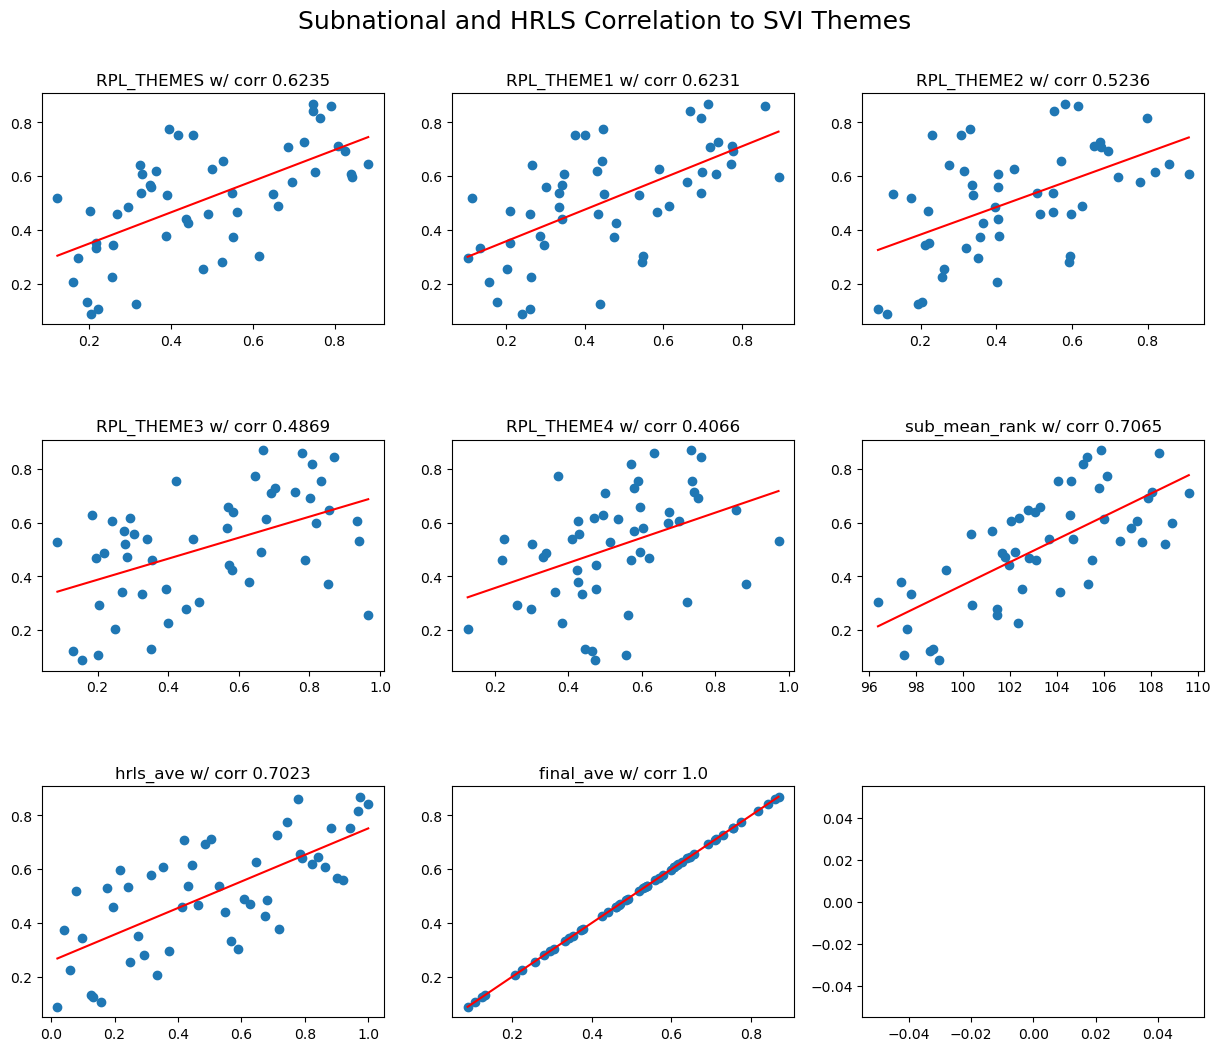

In [32]:
# Create subplots of subnational & hrls & svi themes
big_themes = ['RPL_THEMES','RPL_THEME1','RPL_THEME2','RPL_THEME3','RPL_THEME4','sub_mean_rank','hrls_ave','final_ave']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Subnational and HRLS Correlation to SVI Themes", fontsize=18, y=0.95)

# Loop through indices of correlation
for svi_col, ax in zip(big_themes, axs.ravel()):   
        y=sub_hrls_svi_med_merged['final_ave']
        x=sub_hrls_svi_med_merged[svi_col]

        correlation = y.corr(x)

        plt.plot(ax=ax)

        # plot the data
        ax.scatter(x, y)

        # fits the best fitting line to the data
        ax.plot(np.unique(x),
            np.poly1d(np.polyfit(x, y, 1))
            (np.unique(x)), color='red')
        
        ax.set_title(svi_col +" w/ corr " + str(round(correlation,4)))


plt.show()

##### 2.2 Subnational and SVI Correlation

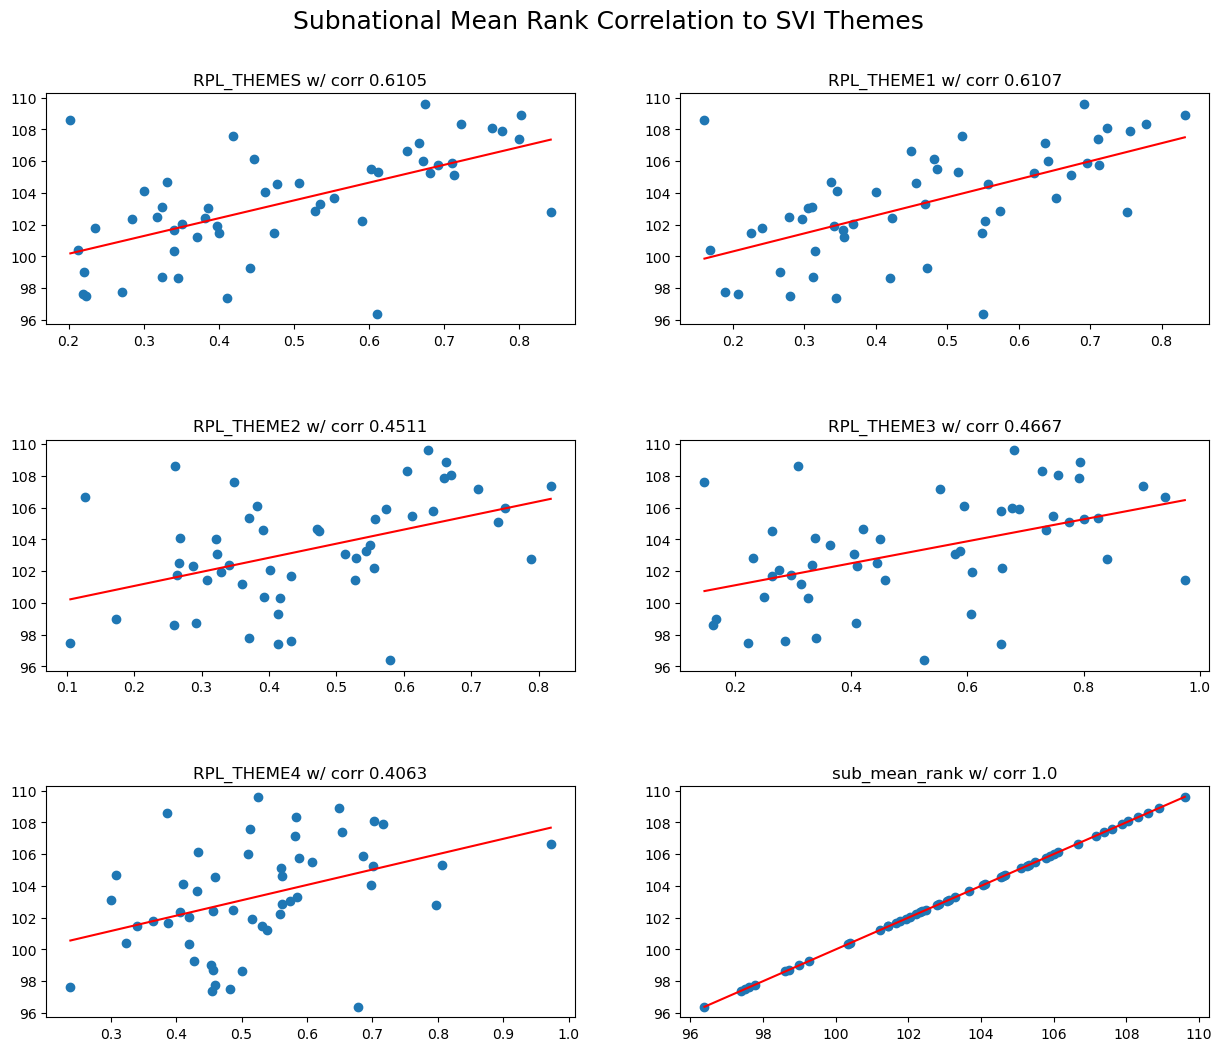

In [33]:
# Create subplots of subnational & svi themes
big_themes = ['RPL_THEMES','RPL_THEME1','RPL_THEME2','RPL_THEME3','RPL_THEME4','sub_mean_rank']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Subnational Mean Rank Correlation to SVI Themes", fontsize=18, y=0.95)

# Loop through indices of correlation
for svi_col, ax in zip(big_themes, axs.ravel()):   
        y=svi_st_merged['sub_mean_rank']
        x=svi_st_merged[svi_col]

        correlation = y.corr(x)

        plt.plot(ax=ax)

        # plot the data
        ax.scatter(x, y)
 
        # fits the best fitting line to the data
        ax.plot(np.unique(x),
            np.poly1d(np.polyfit(x, y, 1))
            (np.unique(x)), color='red')
        
        ax.set_title(svi_col +" w/ corr " + str(round(correlation,4)))

plt.show()

#### 1.3 HRLS to SVI Comparison

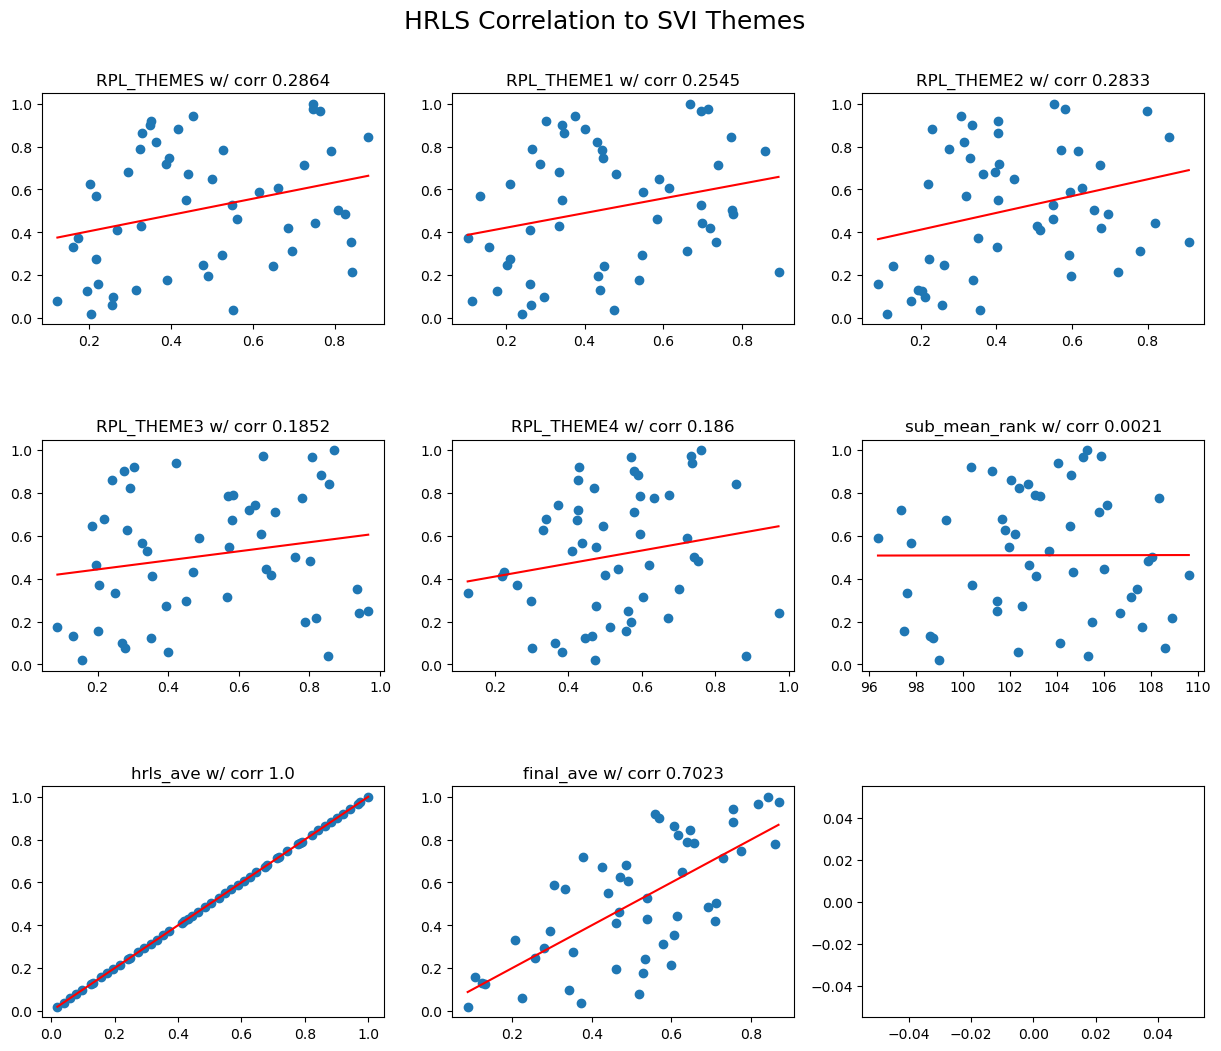

In [34]:
# Create subplots of subnational & hrls & svi themes
big_themes = ['RPL_THEMES','RPL_THEME1','RPL_THEME2','RPL_THEME3','RPL_THEME4','sub_mean_rank','hrls_ave','final_ave']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("HRLS Correlation to SVI Themes", fontsize=18, y=0.95)

# Loop through indices of correlation
for svi_col, ax in zip(big_themes, axs.ravel()):   
        y=sub_hrls_svi_med_merged['hrls_ave']
        x=sub_hrls_svi_med_merged[svi_col]

        correlation = y.corr(x)

        plt.plot(ax=ax)

        # plot the data
        ax.scatter(x, y)

        # fits the best fitting line to the data
        ax.plot(np.unique(x),
            np.poly1d(np.polyfit(x, y, 1))
            (np.unique(x)), color='red')
        
        ax.set_title(svi_col +" w/ corr " + str(round(correlation,4)))


plt.show()

In [ ]:
# Create individual plots of correlation
# Loop through certain indeces of correlation
# plotting the data
for svi_col in iteratethis:   
        y=svi_st_merged['sub_mean_rank']
        x=svi_st_merged[svi_col]

        correlation = y.corr(x)

        # adds the title
        plt.title(svi_col +" has correlation of " + str(round(correlation,4)))
 
        # plot the data
        plt.scatter(x, y)
 
        # fits the best fitting line to the data
        plt.plot(np.unique(x),
            np.poly1d(np.polyfit(x, y, 1))
            (np.unique(x)), color='red')
 
        # Labelling axes
        plt.xlabel(i)
        plt.ylabel('subnational mean rank')
        
        #plt.show()

Definitions from "SVI2020Documentation"

EPL_NOHSDP: Percentile percentage of persons with no high school diploma (age 25+) estimate
EP_NOHSDP: Percentage of persons with no high school diploma (age 25+) estimate
RPL_THEMES: Overall percentile ranking
SPL_THEMES: Sum of series themes
RPL_THEME1: Percentile ranking for Socioeconomic Status theme summary
SPL_THEME1: Sum of series for Socioeconomic Status theme

Four Themes: Socioeconomic status, househould characteristics, racial & ethnic minority status, housing type/transportation